### Volatility

In [1]:
import numpy as np
from pandas_datareader import data as pdr
import datetime as dt
import pandas as pd
import yfinance as yf
yf.pdr_override()

In [2]:
data = pdr.get_data_yahoo("^GSPC", start="1957-03-05", end="2023-04-30")

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1957-03-05,44.220001,44.220001,44.220001,44.220001,44.220001,1860000
1957-03-06,44.230000,44.230000,44.230000,44.230000,44.230000,1840000
1957-03-07,44.209999,44.209999,44.209999,44.209999,44.209999,1830000
1957-03-08,44.070000,44.070000,44.070000,44.070000,44.070000,1630000
1957-03-11,43.779999,43.779999,43.779999,43.779999,43.779999,1650000
...,...,...,...,...,...,...
2023-04-24,4132.069824,4142.410156,4117.770020,4137.040039,4137.040039,3290940000
2023-04-25,4126.430176,4126.430176,4071.379883,4071.629883,4071.629883,3978640000
2023-04-26,4087.780029,4089.669922,4049.350098,4055.989990,4055.989990,3837030000


In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1957-03-05,44.220001,44.220001,44.220001,44.220001,44.220001,1860000
1957-03-06,44.230000,44.230000,44.230000,44.230000,44.230000,1840000
1957-03-07,44.209999,44.209999,44.209999,44.209999,44.209999,1830000
1957-03-08,44.070000,44.070000,44.070000,44.070000,44.070000,1630000
1957-03-11,43.779999,43.779999,43.779999,43.779999,43.779999,1650000


In [5]:
high_low = data['High'] - data['Low']
high_cp = np.abs(data['High'] - data['Close'].shift())
low_cp = np.abs(data['Low'] - data['Close'].shift())

In [6]:
df = pd.concat([high_low, high_cp, low_cp], axis=1)

In [7]:
true_range = np.max(df, axis=1)

In [8]:
average_true_range = true_range.rolling(14).mean()

In [9]:
average_true_range

Date
1957-03-05          NaN
1957-03-06          NaN
1957-03-07          NaN
1957-03-08          NaN
1957-03-11          NaN
                ...    
2023-04-24    35.757098
2023-04-25    37.142840
2023-04-26    38.019967
2023-04-27    41.217861
2023-04-28    41.641427
Length: 16653, dtype: float64

In [10]:
true_range.rolling(14).sum()/14

Date
1957-03-05          NaN
1957-03-06          NaN
1957-03-07          NaN
1957-03-08          NaN
1957-03-11          NaN
                ...    
2023-04-24    35.757098
2023-04-25    37.142840
2023-04-26    38.019967
2023-04-27    41.217861
2023-04-28    41.641427
Length: 16653, dtype: float64

In [11]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


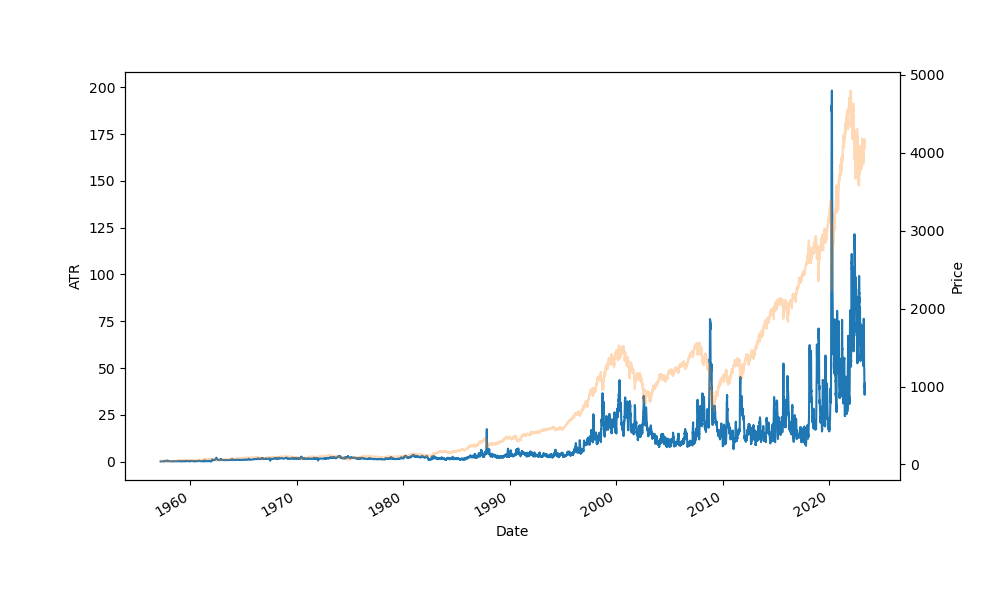

Text(0, 0.5, 'Price')

In [12]:
fig, ax = plt.subplots(figsize=(10,6))
average_true_range.plot(ax=ax)
ax2 = data['Close'].plot(ax=ax, secondary_y=True, alpha=.3)
ax.set_ylabel("ATR")
ax2.set_ylabel("Price")